# Cloud Computing
## Programming Assignment I - Spark

In [1]:
import os
import sys
import seaborn as sns
from pyspark.sql import functions
from matplotlib import pyplot as plt

In [2]:
from pyspark.sql import SparkSession

In [3]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["HADOOP_INSTALL"] = "/home/hadoop/hadoop"
os.environ["HADOOP_HOME"] = os.environ["HADOOP_INSTALL"]
os.environ["HADOOP_MAPRED_HOME"] = os.environ["HADOOP_INSTALL"]
os.environ["HADOOP_COMMON_HOME"] = os.environ["HADOOP_INSTALL"]
os.environ["HADOOP_HDFS_HOME"] = os.environ["HADOOP_INSTALL"]
os.environ["HADOOP_YARN_HOME"] = os.environ["HADOOP_INSTALL"]
os.environ["HADOOP_CONF_DIR"] = os.path.join(os.environ["HADOOP_INSTALL"], "/etc/hadoop")
os.environ["SPARK_HOME"] = "/home/hadoop/spark"
sys.path.insert(0, os.path.join(os.environ["SPARK_HOME"], "python"))
sys.path.append(os.path.join(os.environ["SPARK_HOME"], "python/lib/py4j-0.10.9.2-src.zip"))

In [4]:
sns.set_style("darkgrid")

In [5]:
SPARK_EXEC_INSTANCES = "2"
SPARK_EXEC_CORES = "2"
SPARK_MEM = "512M"

In [6]:
spark = SparkSession.Builder().appName("Cloud Computing TP1").config("spark.executor.instances", SPARK_EXEC_INSTANCES).config("spark.executor.cores", SPARK_EXEC_CORES).config("spark.executor.memory", SPARK_MEM).getOrCreate()
sc = spark.sparkContext

2023-09-25 23:02:53,733 WARN util.Utils: Your hostname, cloud resolves to a loopback address: 127.0.2.1; using 192.168.121.62 instead (on interface eth0)
2023-09-25 23:02:53,734 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2023-09-25 23:02:54,895 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-09-25 23:02:56,673 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
2023-09-25 23:02:56,674 WARN util.Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
2023-09-25 23:02:56,674 WARN util.Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
2023-09-25 23:02:56,675 WARN util.Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
2023-09-25 23:02:56,675

In [7]:
print(sc.uiWebUrl)

http://192.168.121.62:4045


In [8]:
tracks = spark.read.json("hdfs:/datasets/spotify/tracks.json")

In [9]:
tracks.show(10, truncate=False)

+--------------------------------------------+------------------------------------+------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|album_name                                  |album_uri                           |artist_name       |artist_uri                           |duration_ms|pid|pos|track_name                                |track_uri                           |
+--------------------------------------------+------------------------------------+------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|The Cookbook                                |spotify:album:6vV5UrXcfyQD1wu4Qo2I9K|Missy Elliott     |spotify:artist:2wIVse2owClT7go1WT98tk|226863     |0  |0  |Lose Control (feat. Ciara & Fat Man Scoop)|spotify:track:0UaMYEvWZi0ZqiDOoHU3YI|
|In The Zone                        

In [10]:
tracks_shape = (tracks.count(), len(tracks.columns))

In [11]:
playlist = spark.read.json("hdfs:/datasets/spotify/playlist.json")

In [12]:
playlist.show(10, truncate=False)

+-------------+-----------+-----------+-----------+--------------------+----------+-----------+---------+-------------+----------+---+
|collaborative|description|duration_ms|modified_at|name                |num_albums|num_artists|num_edits|num_followers|num_tracks|pid|
+-------------+-----------+-----------+-----------+--------------------+----------+-----------+---------+-------------+----------+---+
|false        |null       |11532414   |1493424000 |Throwbacks          |47        |37         |6        |1            |52        |0  |
|false        |null       |11656470   |1506556800 |Awesome Playlist    |23        |21         |5        |1            |39        |1  |
|false        |null       |14039958   |1505692800 |korean              |51        |31         |18       |1            |64        |2  |
|false        |null       |28926058   |1501027200 |mat                 |107       |86         |4        |1            |126       |3  |
|false        |null       |4335282    |1401667200 |90s 

In [13]:
playlist_shape = (playlist.count(), len(playlist.columns))

## Task 1

In [14]:
tracks.select(functions.min("duration_ms"), functions.max("duration_ms"), functions.mean("duration_ms")).show()

+----------------+----------------+------------------+
|min(duration_ms)|max(duration_ms)|  avg(duration_ms)|
+----------------+----------------+------------------+
|               0|        10435467|234408.54976216817|
+----------------+----------------+------------------+



In [15]:
quantile25, quantile75 = tracks.approxQuantile("duration_ms", (0.25, 0.75), 0.001)

In [16]:
iqr = quantile75 - quantile25

/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWar

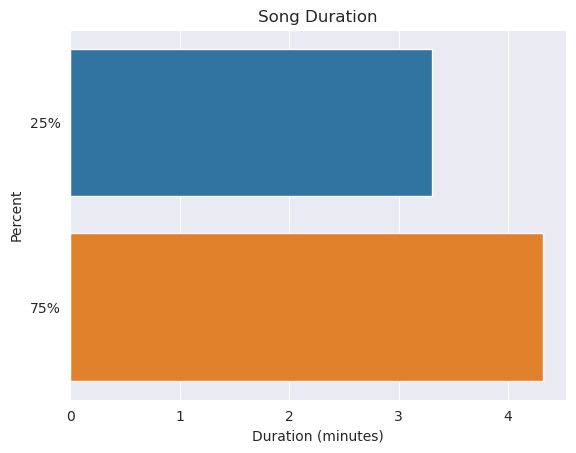

In [17]:
sns.barplot(y=["25%", "75%"], x=[quantile25 / 60000., quantile75 / 60000.], orient="h")
plt.xlabel("Duration (minutes)")
plt.ylabel("Percent")
plt.title("Song Duration")
plt.show()

In [18]:
(quantile25, quantile75, iqr)

(198320.0, 258826.0, 60506.0)

In [19]:
filtered = tracks[(quantile25 - 1.5 * iqr < tracks["duration_ms"]) & (tracks["duration_ms"] < quantile75 + 1.5 * iqr)]

In [20]:
filtered.show(10, truncate=False)

+--------------------------------------------+------------------------------------+------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|album_name                                  |album_uri                           |artist_name       |artist_uri                           |duration_ms|pid|pos|track_name                                |track_uri                           |
+--------------------------------------------+------------------------------------+------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|The Cookbook                                |spotify:album:6vV5UrXcfyQD1wu4Qo2I9K|Missy Elliott     |spotify:artist:2wIVse2owClT7go1WT98tk|226863     |0  |0  |Lose Control (feat. Ciara & Fat Man Scoop)|spotify:track:0UaMYEvWZi0ZqiDOoHU3YI|
|In The Zone                        

In [21]:
outliers = tracks.subtract(filtered)

In [22]:
outliers.show(10, truncate=False)

+--------------------------------------------------------------------------------+------------------------------------+--------------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|album_name                                                                      |album_uri                           |artist_name               |artist_uri                           |duration_ms|pid|pos|track_name                                |track_uri                           |
+--------------------------------------------------------------------------------+------------------------------------+--------------------------+-------------------------------------+-----------+---+---+------------------------------------------+------------------------------------+
|Appetite For Destruction                                                        |spotify:album:3I9Z1nDCL4E0cP62flcbI5|Guns N' Roses             

In [23]:
outliers_shape = (outliers.count(), len(outliers.columns))

In [24]:
outliers_shape

(559968, 9)

In [25]:
outliers.select(functions.min("duration_ms"), functions.max("duration_ms"), functions.mean("duration_ms")).show()

+----------------+----------------+------------------+
|min(duration_ms)|max(duration_ms)|  avg(duration_ms)|
+----------------+----------------+------------------+
|               0|        10435467|371203.21056560375|
+----------------+----------------+------------------+



## Task 2

In [14]:
tracks.createOrReplaceTempView("Tracks")
top5 = spark.sql("select artist_name, count(pid) as pop_count from Tracks group by artist_name order by pop_count desc limit 5")

In [15]:
top5.show()

+--------------+---------+
|   artist_name|pop_count|
+--------------+---------+
|         Drake|   134998|
|    Kanye West|    65906|
|Kendrick Lamar|    55211|
|       Rihanna|    54060|
|    The Weeknd|    50357|
+--------------+---------+



In [16]:
artists = [value["artist_name"] for value in top5.select("artist_name").collect()]
counts = [value["pop_count"] for value in top5.select("pop_count").collect()]

/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/otviosilva/mambaforge/envs/cloud-comp-spark3.2.0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWar

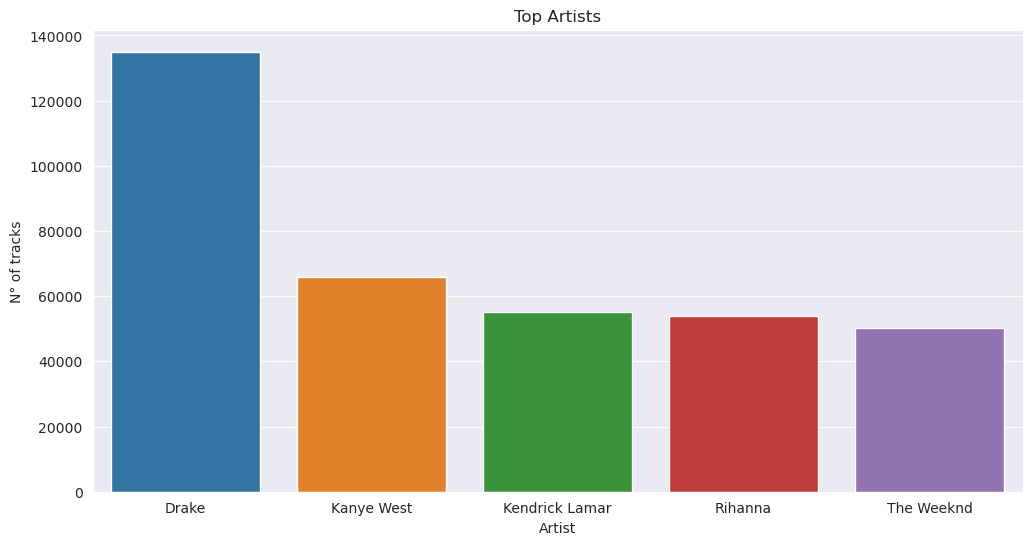

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=artists, y=counts)
plt.xlabel("Artist")
plt.ylabel("N° of tracks")
plt.title("Top Artists")
plt.show()

In [18]:
formatted = playlist.select(functions.split(functions.from_unixtime("modified_at"), '-').getItem(0))
formatted = formatted.withColumnRenamed(formatted.columns[0], "year")
playlist_with_year = playlist.join(formatted)

In [19]:
playlist_with_year.show(10, truncate=False)

+-------------+-----------+-----------+-----------+----------+----------+-----------+---------+-------------+----------+---+----+
|collaborative|description|duration_ms|modified_at|name      |num_albums|num_artists|num_edits|num_followers|num_tracks|pid|year|
+-------------+-----------+-----------+-----------+----------+----------+-----------+---------+-------------+----------+---+----+
|false        |null       |11532414   |1493424000 |Throwbacks|47        |37         |6        |1            |52        |0  |2017|
|false        |null       |11532414   |1493424000 |Throwbacks|47        |37         |6        |1            |52        |0  |2017|
|false        |null       |11532414   |1493424000 |Throwbacks|47        |37         |6        |1            |52        |0  |2017|
|false        |null       |11532414   |1493424000 |Throwbacks|47        |37         |6        |1            |52        |0  |2017|
|false        |null       |11532414   |1493424000 |Throwbacks|47        |37         |6    

In [20]:
years = sorted([value["year"] for value in formatted.distinct().collect()])

In [21]:
tracks_with_year = playlist_with_year.join(tracks, on="pid")

In [26]:
tracks_with_year.createOrReplaceTempView("Tracks")
top5.createOrReplaceTempView("Top5")
result = spark.sql("select Top5.artist_name, year, count(pid) as pop_count from (Top5 inner join Tracks on Tracks.artist_name = Top5.artist_name) group by Top5.artist_name, year")

In [27]:
result.show(truncate=False)

KeyboardInterrupt: 

In [40]:
df = result.toPandas()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="pop_count", hue="artist_name")
plt.show()